In [ ]:
#strong (naive) independence assumptions between the features.predict whether a passenger survived the sinking of the Titanic (Survived column) based on features like Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked.
#the hypothesis 𝐻,H often represents the class membership of a data point, and the evidence𝐸,E represents the features of the data point. For instance, predicting whether a passenger survived on the Titanic based on features like gender and class
#types of Naive Bayes Classifiers==>Gaussian Naive Bayes,Multinomial Naive Bayes,Bernoulli Naive Bayes
#Gaussian Naive Bayes: Assumes that the features follow a normal (Gaussian) distribution. It's used for continuous data.
#Multinomial Naive Bayes: Used for discrete data and is popular for text classification (e.g., spam detection).
#Bernoulli Naive Bayes: Used for binary/boolean features, such as the presence or absence of a word in a document

In [ ]:
#select some of independent feature for train data
#convert text data into numeric using mapping, lambda,label encoder,or dummies here we are using dummies variable
#if we use dummies drop one of colunm
#check any null value is there or not if is there then fill it 
#use GaussianNB naive classifier as dataset are continous
#then predict score
#predict x_test prob whether they are survived or not array 1st element denote0 2nd element denote1
#check cross val score use GaussianNB for 5 fold/parts


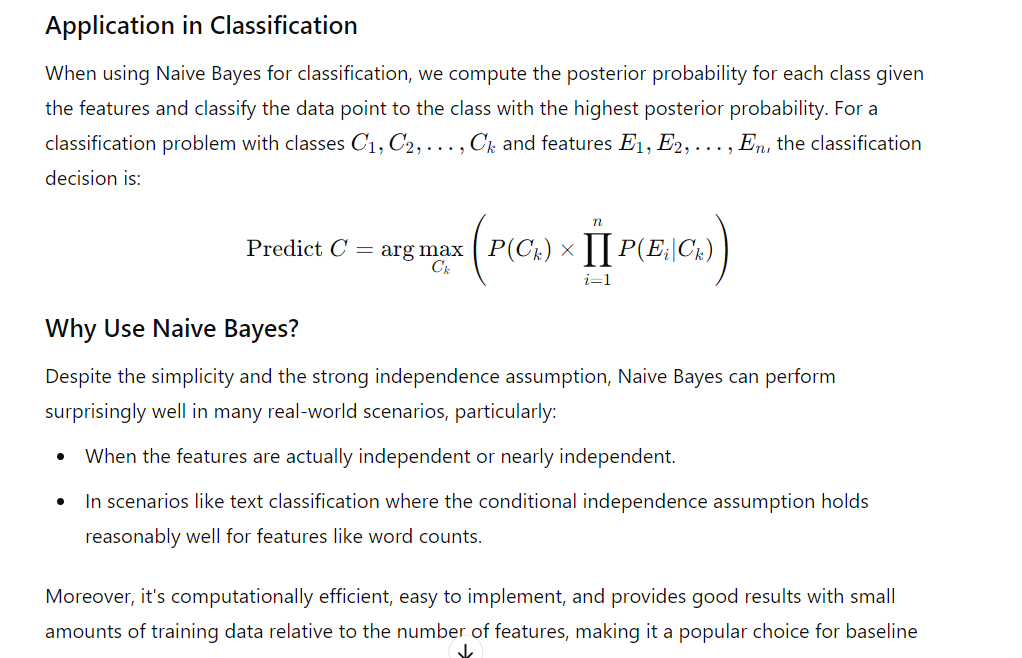



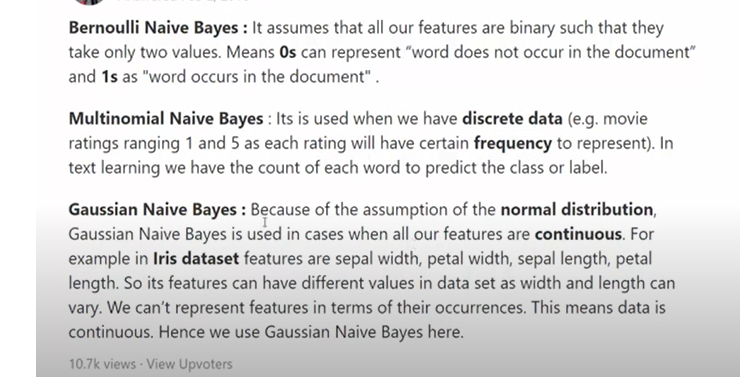

# Short Notes


select some of independent feature for train data

convert text data male into numeric using mapping, lambda,label encoder,or dummies here we are using dummies variable

fill null value in age col by mean

use GaussianNB naive classifier as dataset are continous

then predict score

predict x_test prob whether they are survived or not array 1st element denote0 2nd element denote1

check cross val score use GaussianNB for 5 fold/parts


# Question

model.predict(X_test[0:10])

model.predict_proba(X_test[:10])

cross_val_score(GaussianNB(),X_train, y_train, cv=5)

In [2]:

import pandas as pd

In [3]:
# Specify the path to your CSV file
file_path = r'R:\ML\ML nd Dl by codebasics\csv\titanic.csv'

# Load the CSV file into a DataFrame
df= pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [6]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [7]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [8]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


In [9]:
#I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female

In [10]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [11]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [12]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [13]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True
3,1,35.0,53.1000,True
4,3,35.0,8.0500,False


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [16]:

model.fit(X_train,y_train)

GaussianNB()

In [17]:
model.score(X_test,y_test)

0.753731343283582

In [18]:
X_test[0:10]

,Pclass,Age,Fare,female
609,1,40.000000,153.4625,True
499,3,24.000000,7.7958,False
838,3,32.000000,56.4958,False
492,1,55.000000,30.5000,False
92,1,46.000000,61.1750,False
481,2,29.699118,0.0000,False
243,3,22.000000,7.1250,False
850,3,4.000000,31.2750,False
555,1,62.000000,26.5500,False
652,3,21.000000,8.4333,False


In [19]:
y_test[0:10]

609    1
499    0
838    1
492    0
92     0
481    0
243    0
850    0
555    0
652    0
Name: Survived, dtype: int64

In [20]:
model.predict(X_test[0:10])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:

model.predict_proba(X_test[:10])

array([[3.27802845e-05, 9.99967220e-01],
       [9.72800119e-01, 2.71998807e-02],
       [9.51731213e-01, 4.82687868e-02],
       [7.32457006e-01, 2.67542994e-01],
       [6.01390221e-01, 3.98609779e-01],
       [9.38071304e-01, 6.19286964e-02],
       [9.71482450e-01, 2.85175504e-02],
       [9.39823137e-01, 6.01768627e-02],
       [6.90093143e-01, 3.09906857e-01],
       [9.71018506e-01, 2.89814939e-02]])

In [22]:
#Calculate the score using cross validation

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.72     , 0.76     , 0.784    , 0.75     , 0.7983871])

In [ ]:
#preprocessing steps folloow select some independent feature, encoding,fill nan value
# traind and generate model using gaussian nb
#get model score
# find cross val _score foe cv =5